# Natural Language Processing (NLP)

Natural Language Processing (NLP) is a subfield of Artificial Intelligence that enables machines to understand, interpret, and generate human language (text or speech). In a Data Science & ML context (aligned with your DSML syllabus), NLP sits at the intersection of statistics, machine learning, and linguistics.

Why NLP matters
* Most real-world data is unstructured text (emails, reports, social media, surveys).
* NLP converts text into structured, numerical representations usable by ML/DL models.

Common NLP applications
* Sentiment analysis (public opinion, feedback)
* Text classification (spam detection, topic tagging)
* Information extraction (NER, key phrases)
* Chatbots & virtual assistants
* Machine translation and summarizatio

# Text Preprocessing (Core NLP Foundation)

Text preprocessing is the mandatory first stage in any NLP pipeline. Raw text is noisy; preprocessing standardizes it to improve model performance.

Typical Text Preprocessing Steps (in order)
1. Lowercasing: Converts all text to lowercase to avoid duplication of tokens. "Data Science" → "data science"
2. Noise Removal: Removes URLs, HTML tags, emojis, punctuation, numbers (if irrelevant).
3. Tokenization: Splits text into smaller units (words or sentences). "I love NLP" → ["I", "love", "NLP"]
4. Stopword Removal: Removes common but low-information words (is, the, and).
5. Stemming: Reduces words to root form (rule-based, fast, rough). "running" → "run"
6. Lemmatization: Converts words to dictionary form (POS-aware, accurate). "better" → "good"
7. Part-of-Speech (POS) Tagging (optional but powerful): Identifies grammatical roles (noun, verb, adjective).
8. Named Entity Recognition (NER) (advanced preprocessing): Extracts entities like Person, Organization, Location.
9. Vectorization (Feature Extraction): Converts cleaned text into numbers:
    * Bag of Words (BoW)
    * TF-IDF
    * Word Embeddings (Word2Vec, GloVe)

In [1]:
!pip install nltk

In [2]:
sent = "Note on Search Functionality: Due to technical limitations and the format of certain materials (e.g., handwritten text), portions of these documents may not be electronically searchable or may produce unreliable search results."

print(sent)

Note on Search Functionality: Due to technical limitations and the format of certain materials (e.g., handwritten text), portions of these documents may not be electronically searchable or may produce unreliable search results.


In [3]:
lower_sent = sent.lower()

lower_sent

'note on search functionality: due to technical limitations and the format of certain materials (e.g., handwritten text), portions of these documents may not be electronically searchable or may produce unreliable search results.'

In [4]:
import re

cleaned = re.sub(r"[^\w\d\s]", "", lower_sent)
cleaned

'note on search functionality due to technical limitations and the format of certain materials eg handwritten text portions of these documents may not be electronically searchable or may produce unreliable search results'

# Stop Words (NLP)

Stop words are commonly occurring words in a language that usually carry little or no semantic meaning on their own and are often removed during text preprocessing in NLP.

Examples of Stop Words: 
    * English: is, am, are, the, a, an, in, on, at, and, but
    * Sentence example:
        * Original: “This is a course on data science”
        * After stop-word removal: “course data science”

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
stopwords_eng = stopwords.words("english")
print(stopwords_eng)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [7]:
temp = [word for word in cleaned.split(" ") if word not in stopwords_eng]
stop_cleaned = " ".join(temp)
stop_cleaned


'note search functionality due technical limitations format certain materials eg handwritten text portions documents may electronically searchable may produce unreliable search results'

In [8]:
temp

['note',
 'search',
 'functionality',
 'due',
 'technical',
 'limitations',
 'format',
 'certain',
 'materials',
 'eg',
 'handwritten',
 'text',
 'portions',
 'documents',
 'may',
 'electronically',
 'searchable',
 'may',
 'produce',
 'unreliable',
 'search',
 'results']

In [9]:
print(temp)

['note', 'search', 'functionality', 'due', 'technical', 'limitations', 'format', 'certain', 'materials', 'eg', 'handwritten', 'text', 'portions', 'documents', 'may', 'electronically', 'searchable', 'may', 'produce', 'unreliable', 'search', 'results']


# Tokenization (NLP)

Tokenization is the process of breaking text into smaller units called tokens, which can be words, subwords, or sentences. It is a fundamental step in Natural Language Processing because ML/DL models cannot process raw text directly.

Why Tokenization Is Important
    * Converts raw text into processable units
    * Foundation for stop-word removal, stemming, lemmatization
    * Directly impacts model accuracy and vocabulary size
    
### Types
    * Word Tokenization
    * Sentence Tokenization
    * Subword tokenization (advanced)

In [12]:
import nltk 
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [13]:
tokens = nltk.word_tokenize(stop_cleaned)
tokens

['note',
 'search',
 'functionality',
 'due',
 'technical',
 'limitations',
 'format',
 'certain',
 'materials',
 'eg',
 'handwritten',
 'text',
 'portions',
 'documents',
 'may',
 'electronically',
 'searchable',
 'may',
 'produce',
 'unreliable',
 'search',
 'results']

# Stemming and Lemmatization
Stemming and Lemmatization are text normalization techniques used in NLP to reduce words to their base form, helping models treat related words as the same feature.



### Stemming
Stemming removes word suffixes using rule-based heuristics.
It is fast but may produce non-dictionary words.



In [14]:
from nltk.stem import LancasterStemmer, PorterStemmer

In [15]:
stemmer = LancasterStemmer()
stemmer.stem("happily")

'happy'

In [16]:
stemmer.stem("runs")

'run'

### Lemmatization
Lemmatization reduces words to their dictionary (lemma) form using vocabulary and Part-of-Speech (POS) information.

In [17]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Suresh\AppData\Roaming\nltk_data...


True

In [18]:
from nltk.stem import WordNetLemmatizer

In [19]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("tasty")

'tasty'

In [20]:
lemmatizer.lemmatize("runs")

'run'

In [22]:
lemmatizer.lemmatize("better")

'better'

In [23]:
lemmatizer.lemmatize("studies")

'study'

In [24]:
lemmatizer.lemmatize("best")

'best'

In [25]:
lemma_tokens = [lemmatizer.lemmatize(word) for word in tokens]

In [27]:
print(lemma_tokens)


['note', 'search', 'functionality', 'due', 'technical', 'limitation', 'format', 'certain', 'material', 'eg', 'handwritten', 'text', 'portion', 'document', 'may', 'electronically', 'searchable', 'may', 'produce', 'unreliable', 'search', 'result']


# word Embeddings 
Word Embeddings are dense vector representations of words that capture their semantic meaning and relationships. Unlike traditional encodings, embeddings place words with similar meanings close together in vector space.

Why Word Embeddings Are Needed
Traditional methods:
* Bag of Words / TF-IDF
    * Sparse vectors
    * No semantic understanding
    * “good” and “excellent” are unrelated
* Word embeddings:
    * Dense, low-dimensional vectors
    * Capture context and meaning
    * Enable similarity, analogy, and reasoning
    
 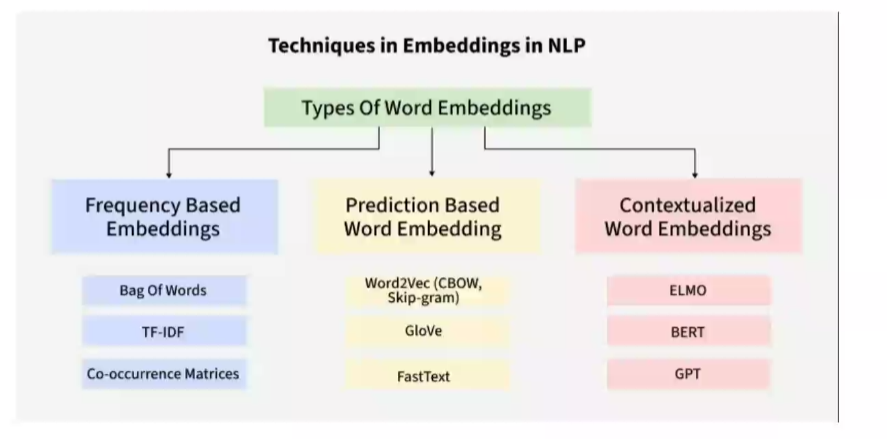

### Bag of Words (BoW)
Bag of Words (BoW) is a text vectorization technique that converts text into numerical features based on word frequency, while ignoring grammar and word order.




* r1: This product is good and is affordable.
* r2: This product is not good and affordable. 
* r3: This product is good and cheap. 

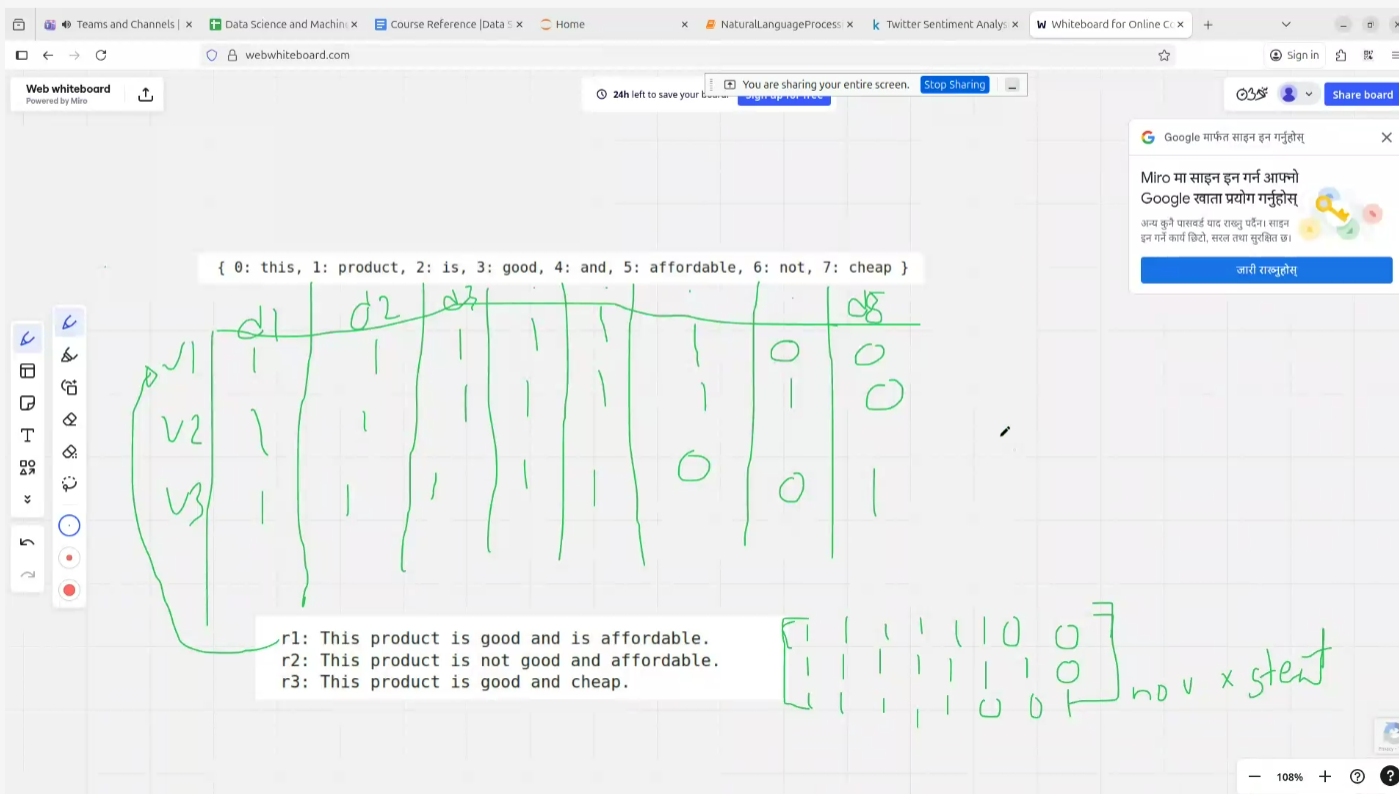

In [28]:
corpus = [
    "This product is good and is affordable.".lower(),
    "This product is not good and affordable.".lower(),
    "This product is good and cheap.".lower()
]
corpus

['this product is good and is affordable.',
 'this product is not good and affordable.',
 'this product is good and cheap.']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer


In [33]:
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(corpus)

In [34]:
matrix.toarray()

array([[1, 1, 0, 1, 2, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 0, 1, 1]])

In [36]:
vectorizer.vocabulary_


{'this': 7,
 'product': 6,
 'is': 4,
 'good': 3,
 'and': 1,
 'affordable': 0,
 'not': 5,
 'cheap': 2}

# TF-IDF
TF-IDF is a text vectorization technique that measures how important a word is to a document within a collection (corpus).
It improves on Bag of Words (BoW) by down-weighting very common words and up-weighting informative ones.
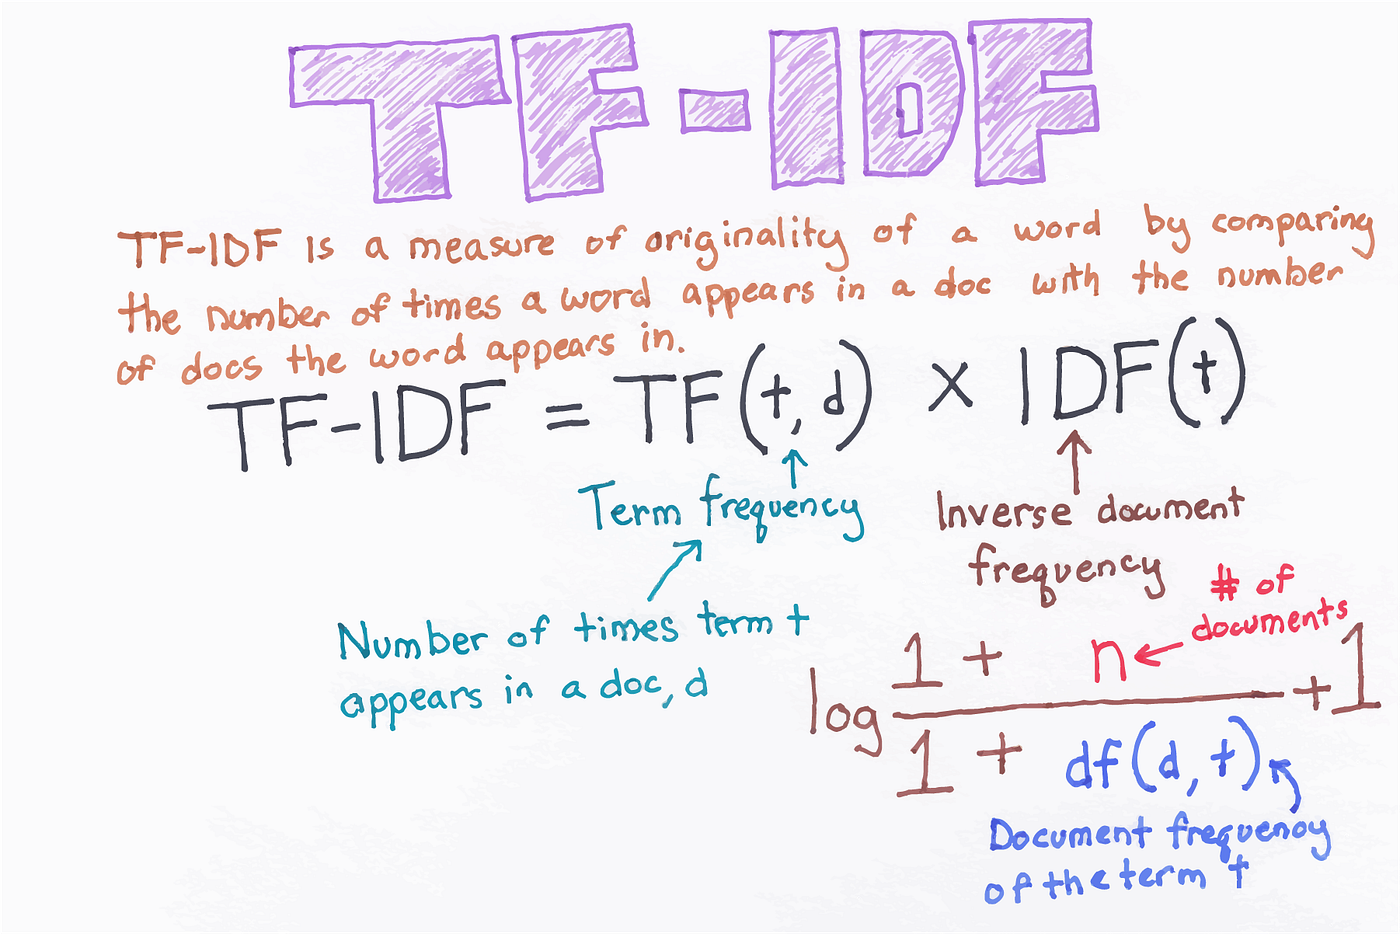

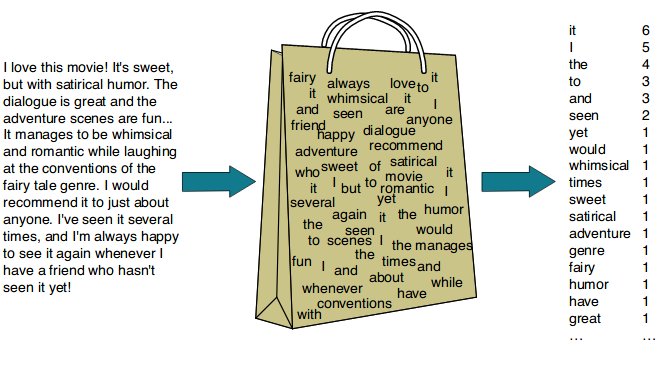

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vocab = {
    'this': 0,
    'product': 1,
    'is': 2,
    'good': 3,
    'and': 4,
    'affordable': 5,
    'not': 6,
    'cheap': 7
}

In [55]:
corpus = [
    "This product is good and is affordable.".lower(),
    "This product is not good and affordable.".lower(),
    "This product is good and cheap.".lower(),
]

vectorizer = TfidfVectorizer(vocabulary=vocab)
matix = vectorizer.fit_transform(corpus)

In [56]:
matix.toarray()

array([[0.32177595, 0.32177595, 0.64355191, 0.32177595, 0.32177595,
        0.41434513, 0.        , 0.        ],
       [0.32401895, 0.32401895, 0.32401895, 0.32401895, 0.32401895,
        0.4172334 , 0.54861178, 0.        ],
       [0.35653519, 0.35653519, 0.35653519, 0.35653519, 0.35653519,
        0.        , 0.        , 0.60366655]])

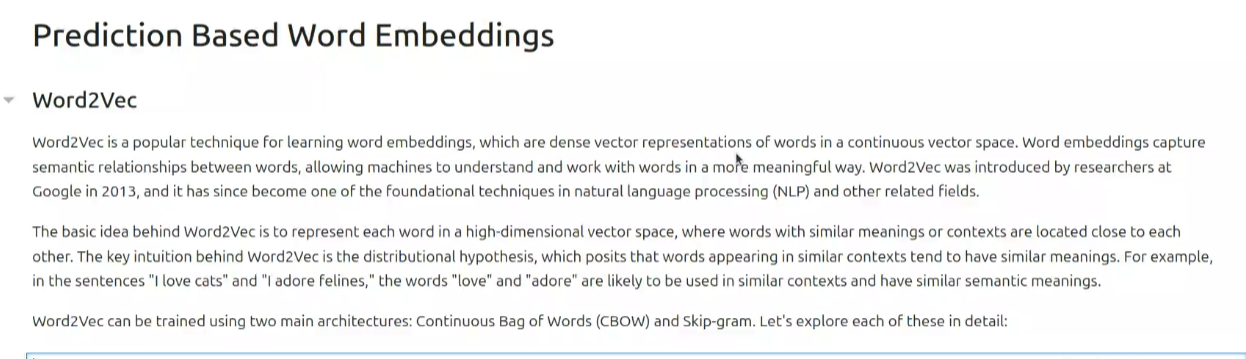

In [45]:
!pip install gensim

   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.4 MB 3.2 MB/s eta 0:00:08
   -- ------------------------------------- 1.3/24.4 MB 2.6 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/24.4 MB 2.3 MB/s eta 0:00:11
   --- ------------------------------------ 1.8/24.4 MB 1.9 MB/s eta 0:00:13
   --- ------------------------------------ 1.8/24.4 MB 1.9 MB/s eta 0:00:13
   --- ------------------------------------ 2.1/24.4 MB 1.6 MB/s eta 0:00:15
   --- ------------------------------------ 2.1/24.4 MB 1.6 MB/s eta 0:00:15
   --- ------------------------------------ 2.4/24.4 MB 1.3 MB/s eta 0:00:18
   --- ------------------------------------ 2.4/24.4 MB 1.3 MB/s eta 0:00:18
   --- ------------------------------------ 2.4/24.4 MB 1.3 MB/s eta 0:00:18
   --- ------------------------------------ 2.4/24.4 MB 1.3 MB/s eta 0:00:18
   --- ------

In [49]:
corpus = [
    "I love cats",
    "I adore felines",
    "Dogs are loyal",
    "Cats and dogs are pets",
    "The sun is shining"
]
 
    
tokenized = [document.lower().split() for document in corpus]
tokenized

[['i', 'love', 'cats'],
 ['i', 'adore', 'felines'],
 ['dogs', 'are', 'loyal'],
 ['cats', 'and', 'dogs', 'are', 'pets'],
 ['the', 'sun', 'is', 'shining']]

In [52]:
from gensim.models import Word2Vec

In [57]:
cbow_model

sg_model

NameError: name 'cbow_model' is not defined